# Исследование поведения покупателей интернет-магазина «Стримчик»

**Описание проекта:** в настоящее время среди пользователей компьюра врядли найдется человек, не игравший в компьютерные игры. Однако в последнее время все больше пользователей предпочитают компьютеру специальные игровые приставки: Xbox, SonyPlayStation. С помощью данных интернет-магазина, специализирующегося на продаже игр, "Стримчик", которые включают в себя данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, мы проведем анализ поведения пользователей, выявим определяющие успешность игры закономерности, разработаем рекомендации для отдела маркетинга в части выбора потенциального бестселлера.

**Цель исследования:**
1. Составить рейтинги ***(топ-5) платформ, (топ-5) жарнов***
2. Ответить на вопрос: "Влияет ли рейтинг ESRB на продажи в отдельном регионе?"
3. Ответить на вопрос: "Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC?"
4. Ответить на вопрос: "Одинаково ли оценивают пользователи жанры Action и Sports?"

**Ход исследования:**
* Подготовка данных: загрузка и изучение общей информации из представленного датасета;
* Предобработка данных: переименование столбцов, обработка пропущенных значений, добавление столбца с подсчетом суммарных продаж в регионах, корректировка типа данных, обработка дубликатов и других аномалий;
* Исследовательский анализ данных: изучение основных характеристик продаж и игр, их распределение;
* Составление портрета пользователей каждого региона;
* Проверка гипотез

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

С помощью данного исследования мы стремимся ответить на вопрос, на какой продукт сделать акцент в рекламной кампании, на что вероятнее всего будет повышенный спрос.


## Загрузка данных и описание данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
import seaborn as sns

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('c/datasets/games.csv')

**Выведем первые 5 строк ДФ**

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Получим общую информацию о датасете**

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Изучим числовые характеристики**

In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:** предварительно изучив информацию о датасете можно сказать: в столбцах "Critic_Score", "User_Score", и "Rating" имеется большое количество пропущенных строк, в названии столбцов присутствует верхний регистр, для столбцов с продажами наблюдается большое количество строк с 0, столбцы "User_Score" и "Rating" заполнены нечисленными значениями.

## Предобработка данных

### Изменение названия столбцов

In [6]:
games.columns = games.columns.str.lower()

### Проверка наличие строк-дубликатов

In [7]:
games.duplicated().sum()

0

Строки-дубликаты отсутствуют.

Найдем строки, где дублируется информация в столбцах name,platform и year_of_release.

In [8]:
games[games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Строки 659 и 12244 непригодны к анализу, строка 16230 не содержит в себе полезной информации. Их можно убрать из анализируемого датасета.

Такие дубликаты могли возникнуть из-за ошибки при записи/чтении/передачи данных.

In [9]:
games.drop([659,14244,16230], inplace= True)

### Преобраование типов данных

**Замена типа данных в столбце user_score**

In [10]:
try:
    games['user_score'] = pd.to_numeric(games['user_score'] )
except:
    print('Ошибка при преобразовании типов данных')

Ошибка при преобразовании типов данных


Так как при преобразовании данных произошла ошибка, проверим, какие значения содержатся в столбце с информацией об оценке пользователей.

In [11]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
games[games['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Так как среди числовых значений содержатся "nan" и "tbd", которые означают, что оценка не установлена, заменим их на NaN.

Аббревиатура "tbd" означает, что значение будет определено позже. Необходимо сообщить разработчикам о наличии в столбце user_score строки "tbd" для игр, которым 5 и более лет.

In [13]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce') 

Изменение типов данных для остальных столбцов не требуется.

### Обработка пропусков

Проверим количество пропусков по столбцам.

In [14]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [15]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


**Обработка пропусков в столбце name**

In [16]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски такого типа невозможно будет заполнить. Для анализа такие данные непригоды.

In [17]:
games = games[~games['name'].isna()]

**Обработка пропусков в столбце year_of_release**

In [18]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Так как пропущенных данных менее 5%, можем избавиться от них.

In [19]:
games = games[~games['year_of_release'].isna()]

Изменим тип данных в столбце на целочисленный.

In [20]:
games.loc[:,'year_of_release'] = games.loc[:,'year_of_release'].astype('int')

**Обработка пропусков в столбце rating**

Посмотрим уникальные значения в столбце

In [21]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинги означают следуюущее:
- Е - для всех возрастов (ранее K-A);
- M - для лиц старше 17 лет;
- Т - для лиц старше 13 лет;
- E10+ - для лиц старше 13-ех лет;
- AO - для лиц старше 18 лет;
- EC - для детей от 3-ех лет;
- RP - рейтинг ожидается.

Соответственно справедлива замена "K-A" на "E" и пропуски - на "unknown"

In [22]:
def rating_rename(rating):
    if rating == 'K-A':
        return 'E'
    else:
        return rating
games['rating'] = games['rating'].map(rating_rename)
games.loc[games['rating'].isna(),'rating'] = games['rating'].fillna('unknown')

Обработка пропусков в остальных столбцах не требуется. Это существенно снизит анализируемый датасет, но заполнение медианным или средним значением пропусков может повлечь искажение результатов анализа зависимости продаж от различных факторов.



### Составление дополнительного столбца с суммарными продажами

Для проведения анализа общемировых тенденций нам понадобится столбец с суммарными продажами игр.

In [23]:
games['sales_total'] = \
games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales'] 

**Вывод:** выполнено приведение названий столбцов к нижнему регистру, проверено отсутсвие строк дубликатов, преобразован тип данных в столбце 'user_score' в числовой для возможности дальнейшего анализа, при этом обработаны строковые значений 'nan' и 'tbd', обработаны пропуски в столбцах 'name', 'rating', подсчитаны в отдельном столбце суммарные продажи во всех регионах.

Причины появления пропусков в различных столбцах разные: так для столбца 'name' и 'genre' наиболее вероятной видится ошибка при чтении/загрузке/записи данных в датасет, однако не стоит исключать человеческий фактор; в столбце 'year_of_release' пропуски могут быть объяснены как багом при выгрузке/записи данных, ошибкой в коде, записывающим дату выпуска игры так и человеческим фактором; пропуски в остальных столбцах - следствие отсутсвия соответсвующих связок игра+платформа в читаемых журналах - для оценки критиков, на сайтах, страницах магазина - для оценок пользователей, в рейтинне ассоциации Entertainment Software Rating Board - для столбца 'rating'

## Исследовательский анализ данных

### Анализ продаж видеоигр по годам

Построим распределение количества выпускаемых в год игр

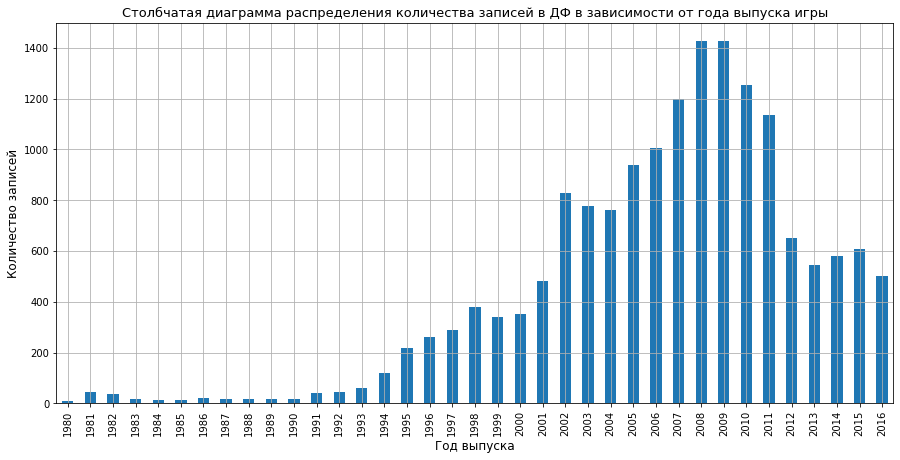

In [24]:
games.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (15,7), grid = True)
plt.title('Столбчатая диаграмма распределения количества записей в ДФ в зависимости от года выпуска игры', size=13)
plt.xlabel('Год выпуска', size=12)
plt.ylabel('Количество записей', size=12)
plt.show()

Из диаграммы видно, что в конце 90-ых индустрия видеоигр начинала свое бурное развитие, однако в поздние 10-е в свзяи с увеличением трат на разработку, ростом качества видеоигр, приходом больших корпораций в индустрию количество выпускаемых игр в год начало снижаться.

### Анализ популярности и времени пользования различных платформ

Посмотрим 5 наиболее популярных платформ для видеоигр:

In [25]:
popular_platform = games['platform'].value_counts().head()
popular_platform

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
Name: platform, dtype: int64

Построим графики продаж для соответствующих платформ

In [26]:
games_popular_platform = games.query('platform in @popular_platform.index')

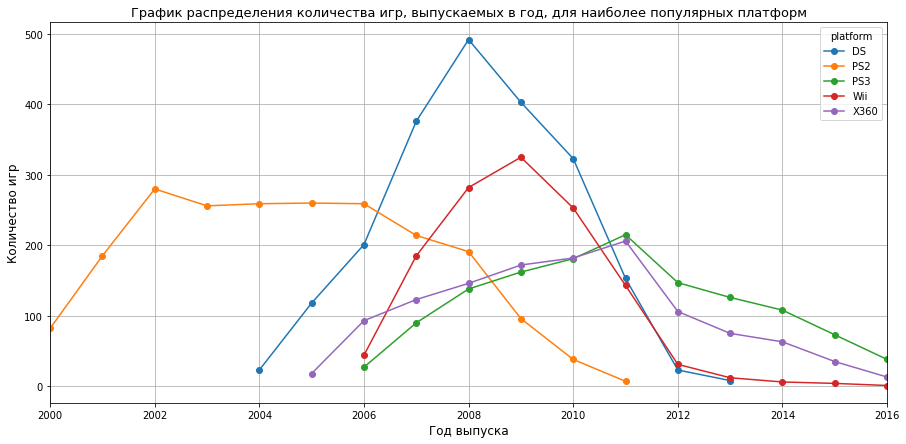

In [27]:
games_popular_platform.pivot_table(
index = 'year_of_release',
columns = 'platform',
values = 'name',
aggfunc = 'count').plot(figsize = (15,7), grid = True, style = 'o-')
plt.title('График распределения количества игр, выпускаемых в год, для наиболее популярных платформ', size=13)
plt.xlabel('Год выпуска', size=12)
plt.ylabel('Количество игр', size=12)
plt.xlim(2000,2016)
plt.show()

Из графиков видно, что для каждой платформы существует некоторое характерное время пользования, во время которого платформа развивается, для нее выпускаются игры и после которого интерес к ним падает.

Проанализируем "время жизни" платформ.

In [28]:
pop_time_table = games.pivot_table(
index = 'platform',
values = 'year_of_release',
aggfunc = ['max','min'])
pop_time_table['platform_lifetime'] = pop_time_table['max'] - pop_time_table['min']
pop_time_table['platform_lifetime'].describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: platform_lifetime, dtype: float64

Самые популярные за все время наблюдений платформы : PS2, DS, PS3, Wii, X360. Установленное медианное время популярности платформы около 6 лет. Это объяснимо тем, что, примерно, раз в 5-6 лет случается значительное улучшение графики игр, появляются новые механики, дорабатываются жанры. Все это требует большей производительности, большей удельной мощности девайса, что ведет к необходимости смены поколений игровых платформ.

### Анализ последних событий на рынке

В соответствии с предыдущими выводами, для анализа ближайшей ситуации на рынке видеоигр необходимо ограничиться ближайшими 6-тью годами.

In [29]:
analize_data = games.query('year_of_release > 2012 and platform != "DS"')
max_sales_analize_data = np.percentile(analize_data['sales_total'],95)


In [30]:
analize_data.shape

(2225, 12)

In [31]:
analize_data.groupby('platform')['sales_total'].describe().sort_values(by = '50%',ascending = False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
X360,186.0,0.735484,1.663275,0.01,0.080,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.060,0.220,0.685,7.39
PS4,392.0,0.801378,1.609456,0.01,0.060,0.200,0.730,14.63
WiiU,115.0,0.562000,1.038778,0.01,0.060,0.200,0.595,7.09
Wii,23.0,0.593913,0.915432,0.01,0.045,0.180,0.755,3.58
PS3,345.0,0.525884,1.451939,0.01,0.040,0.150,0.510,21.05
3DS,303.0,0.472772,1.381347,0.01,0.040,0.090,0.280,14.60
PC,189.0,0.208624,0.352304,0.01,0.030,0.080,0.230,3.05
PSV,358.0,0.092151,0.153816,0.01,0.020,0.040,0.110,1.96


Из приведенного описания численных параметров датасета можно заметить следующие особенности: наибольшее число выпущенных игр на платформе PS4, однако наиболее популярная игра, проданная самым большим тиражом выпускалась на PS3, так же можно заметить, что PSV является достаточно нишевым продуктом - выпущено 358 игр, что близко к числу игр, выпущенных на PS4, а наиболее популярная игра - всего 1,96 млн копий, наименее популярная платформа в рассматриваемый период - DS - 8 игр выпущено, самая популярная не набрала и миллиона продаж.

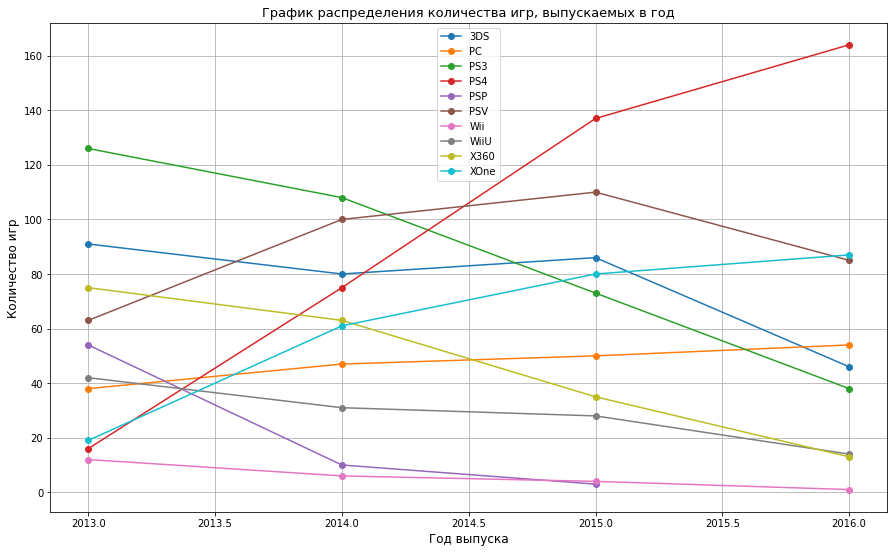

In [32]:
analize_data.pivot_table(
index = 'year_of_release',
columns = 'platform',
values = 'name',
aggfunc = 'count').plot(figsize = (15,9), grid = True, style = 'o-')
plt.title('График распределения количества игр, выпускаемых в год', size=13)
plt.xlabel('Год выпуска', size=12)
plt.ylabel('Количество игр', size=12)
plt.legend()
plt.show()

График показал общую картину из которой заметны лишь яркие тенденции рынка: стремительно падает количество выпускаемых игр на такие платформы как DS, PS3, PSP, менее значимое падение наблюдается у платформ WiU, X360, 3DS.


Это может быть объяснено тем, что именно эти платформы в наблюдаемый период времени заменялись на новое покаление: 3DS, WiU, PSV, PS4, XOne.

Именно поэтому на графике можно наблюдать резкий рост выпускаемых игр на PS4, менее крутой подъем - для XOne и PSV. Другие замены: 3DS, WiU скорее всего не были оценены рынком, поэтому графики количества выпускаемых игр в год для этих платформ достаточно пологие, с небольшим снижением.

PC - универсальная платформа, которая имеет небольшое увеличение ежегодных продаж.

В целом график имеет отрицательную тенденцию по количеству выпускаемых игр.

Проанализируем продажи за "жизненный цикл", попавший в анализируемый промежуток времени для различнх платформ.

In [33]:
table_for_analize = analize_data.groupby('platform')['year_of_release'].agg(['max','min'])
table_for_analize['platform_lifetime'] = table_for_analize['max'] - table_for_analize['min']
table_for_analize['sales_per_platform_lifetime'] = (
    analize_data.groupby('platform')['sales_total'].agg('sum')) / table_for_analize['platform_lifetime']
table_for_analize.sort_values('sales_per_platform_lifetime', ascending = False)

,max,min,platform_lifetime,sales_per_platform_lifetime
platform,,,,
PS4,2016,2013,3,104.713333
PS3,2016,2013,3,60.476667
XOne,2016,2013,3,53.106667
3DS,2016,2013,3,47.750000
X360,2016,2013,3,45.600000
WiiU,2016,2013,3,21.543333
PC,2016,2013,3,13.143333
PSV,2016,2013,3,10.996667
Wii,2016,2013,3,4.553333


В результирующей таблице можно увидеть подтверждение словам, сказанным выше: все новые консоли обошли своих предшественников по продажам. Бурный рост популярности PS4 привел к тому, что игры, выпущенные для нее обошли по тиражу игры для PS3. XOne также обошел своего предшественника X360, однако продажи XOne в два раза ниже, нежели продажи PS4. WiU и PSV - также . DS - сильно устаревшая консоль для анализируемого промежутка.

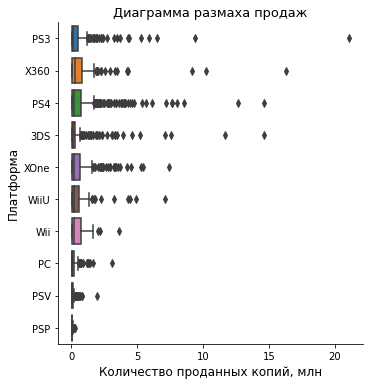

In [34]:
sns.catplot(x='sales_total', y='platform', kind='box',
            data=(
                analize_data
                
                .sort_values('sales_total', ascending = False)))
plt.title('Диаграмма размаха продаж', size=13)
plt.xlabel('Количество проданных копий, млн', size=12)
plt.ylabel('Платформа', size=12)
plt.show()

Из графика видно, что хиты продаж в анализируемый промежуток в основном присущи старым платформам: X360, PS3.

Поставим условие на количество проданных копий, чтобы рассмотреть поближе медианные значения.

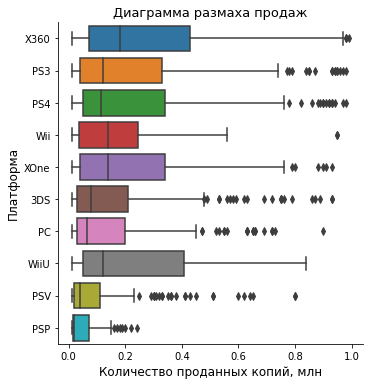

In [35]:
sns.catplot(x='sales_total', y='platform', kind='box',
            data=(
                analize_data
                .query('sales_total < 1')
                .sort_values('sales_total', ascending = False)))
plt.title('Диаграмма размаха продаж', size=13)
plt.xlabel('Количество проданных копий, млн', size=12)
plt.ylabel('Платформа', size=12)
plt.show()

**Вывод:** На рынке наблюдается тенденция на укрупнение, улучшение качества выпускаемых игр и снижение количества, тем не их менее продажи растут. Это может поддтверждаться тем, что все новые консоли обошли своих предшественников по продажам. Бурный рост популярности PS4 привел к тому, что игры, выпущенные для нее обошли по тиражу игры для PS3. Медианное время жизни платформы - 6, поэтому наиболее привлекательными с точки зрения развития являются PS4 и XOne. PC не является самой популярной или самой непопулярной платформой, однако продажи игр на нем говорят о том, что в анализируемый промежуток времени на рынке видеоигр лидируют специальные платформы, нежели универсальный PC.

### Анализ влияния оценок критиков и геймеров на продажи

#### Анализ зависимости продаж от оценок критиков

Создадим датасет для анализа влияния оценок критиков на общемировые продажи

In [36]:
critic_corr_games = (analize_data.query('sales_total<@max_sales_analize_data and platform != "PSP"')
                     .dropna(subset = ['critic_score']))

Построим зависимости продаж от оценок критиков для разных платформ:

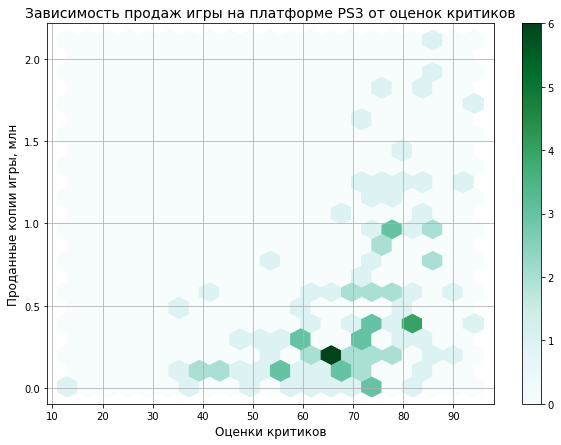

Коэффициент корреляции между оценками критиков и общими продажами игр на PS3 равен {0.47180521223432514}


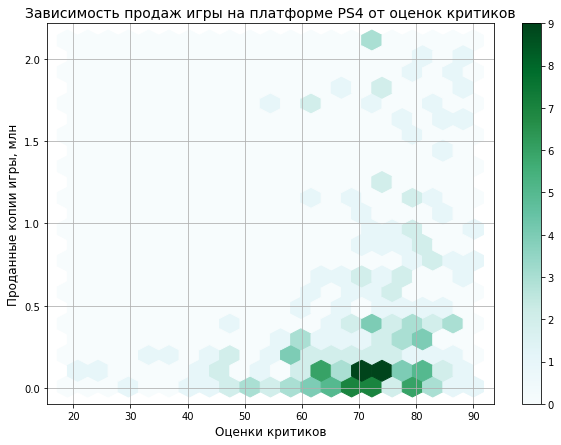

Коэффициент корреляции между оценками критиков и общими продажами игр на PS4 равен {0.2956474372490874}


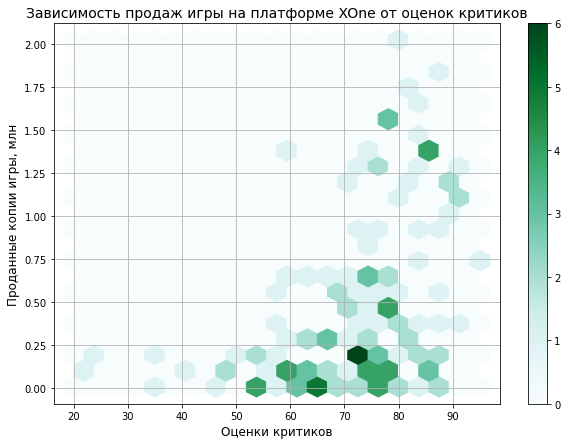

Коэффициент корреляции между оценками критиков и общими продажами игр на XOne равен {0.43259010883567667}


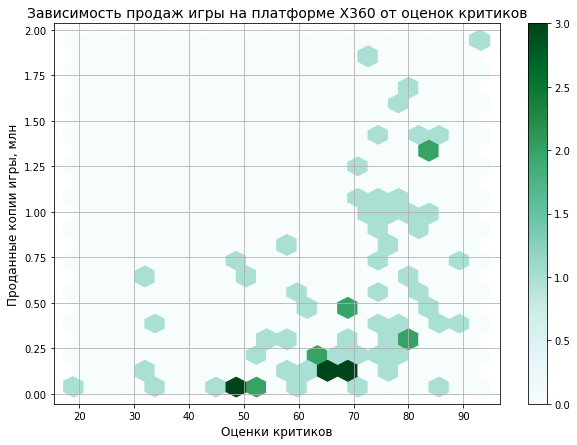

Коэффициент корреляции между оценками критиков и общими продажами игр на X360 равен {0.4912768032145573}


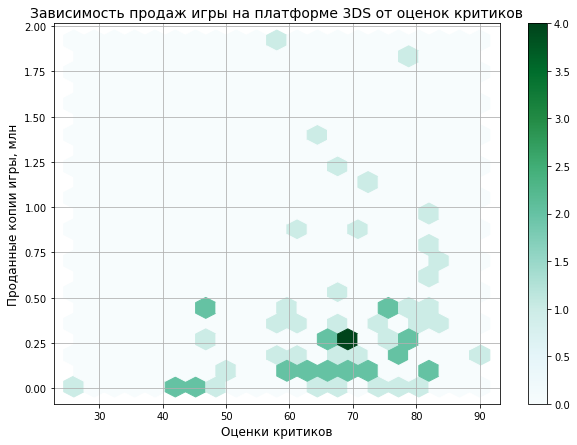

Коэффициент корреляции между оценками критиков и общими продажами игр на 3DS равен {0.18069228080399055}


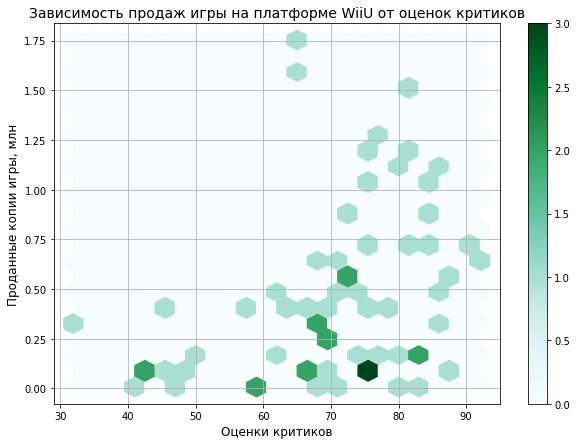

Коэффициент корреляции между оценками критиков и общими продажами игр на WiiU равен {0.34815759804781055}


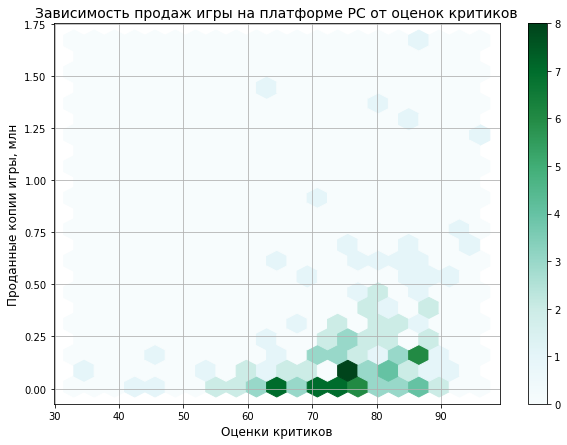

Коэффициент корреляции между оценками критиков и общими продажами игр на PC равен {0.28535220625421537}


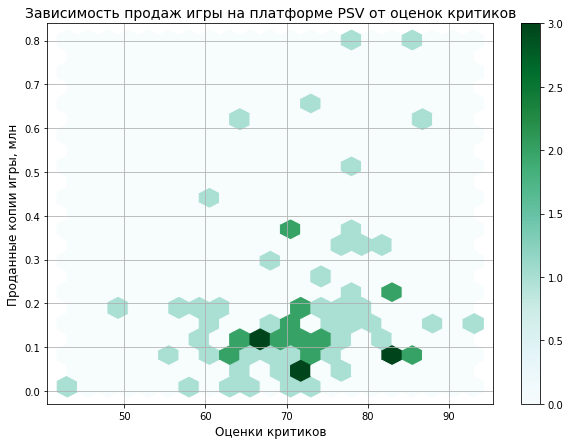

Коэффициент корреляции между оценками критиков и общими продажами игр на PSV равен {0.25474235030686565}


In [37]:
critic_corr_list =[]
for platform in critic_corr_games['platform'].unique():
    (critic_corr_games
     .query('platform == @platform')
     .plot(x='critic_score',
           y='sales_total',
           kind='hexbin',
           gridsize=20,
           figsize=(10, 7),
           sharex=False,
           grid=True)
    )
    corr_coef = critic_corr_games[critic_corr_games['platform'] == platform]['sales_total']\
     .corr(critic_corr_games[critic_corr_games['platform'] == platform]['critic_score'])
    plt.title(f'Зависимость продаж игры на платформе {platform} от оценок критиков', size=14)
    plt.xlabel('Оценки критиков', size=12)
    plt.ylabel('Проданные копии игры, млн', size=12)
    plt.show()
    print(f'Коэффициент корреляции между оценками критиков и общими продажами игр на {platform} равен',\
    {corr_coef})
    critic_corr_list.append(corr_coef)

Оценим значения коэффициентов корреляции

In [38]:
critic_corr_series = pd.Series(critic_corr_list)
critic_corr_series.describe()

count    8.000000
mean     0.345033
std      0.111031
min      0.180692
25%      0.277700
50%      0.321903
75%      0.442394
max      0.491277
dtype: float64

Непосредственной прямой зависимости ни из графика, ни из посчитанного значения не видится. Нельзя точно утверждать, что успешные продажи зависят от оценки критиков. На графиках виднеются записи с большими продажами и низкими оценками критиков. Для высоких оценок характерны более высокие продажи, но велика вероятность, что не оценки определяют успех. Наибольшая концентрация оценок критиков в средне-высоких значениях: от ~55 до ~75. Однако, нельзя сказать, что такие выводы характерны для всех платформ. Так на X360, PS3 зависимость возможна.

#### Анализ зависимости продаж от оценок игроков

Создадим датасет для анализа влияния оценок геймеров на общемировые продажи

In [39]:
user_corr_games = (analize_data.query('sales_total<@max_sales_analize_data and platform != "PSP"')
                   .dropna(subset = ['user_score']))
user_corr_games[user_corr_games['platform']=='Wii']#.shape

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
850,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.0,0.17,NaN,8.4,E10+,2.01
1158,Disney Infinity,Wii,2013,Action,1.05,0.41,0.0,0.14,NaN,4.2,E10+,1.60
3611,FIFA 15,Wii,2014,Sports,0.15,0.37,0.0,0.04,NaN,4.3,E,0.56
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.0,0.02,NaN,4.3,E,0.38
6443,Angry Birds Star Wars,Wii,2013,Strategy,0.15,0.09,0.0,0.02,NaN,2.8,E,0.26


Построим зависимости продаж от оценок игроков для разных платформ:

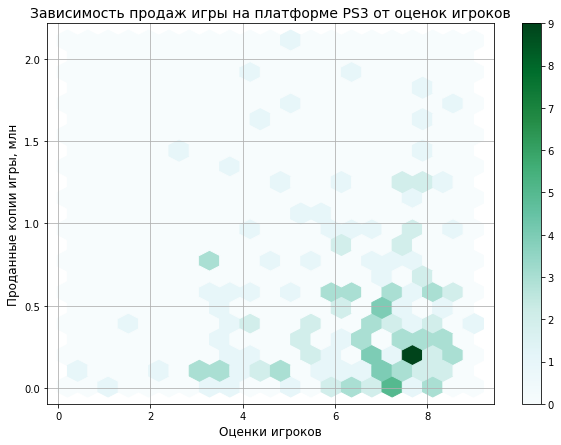

Коэффициент корреляции между оценками игроков и общими продажами игр на PS3 равен {0.014029618558464161}


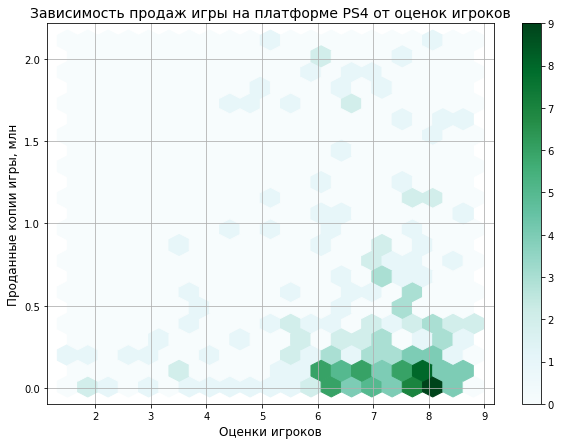

Коэффициент корреляции между оценками игроков и общими продажами игр на PS4 равен {-0.018055116417282656}


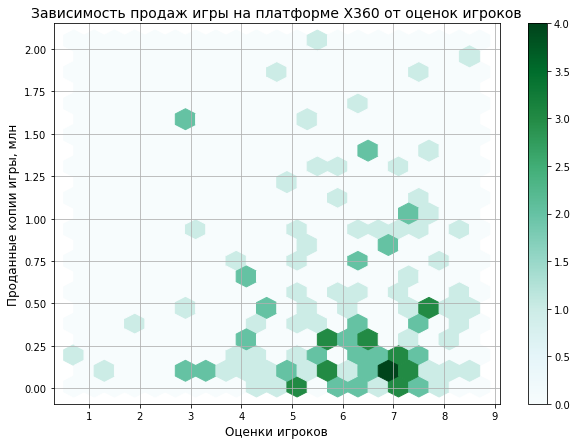

Коэффициент корреляции между оценками игроков и общими продажами игр на X360 равен {0.06061937470693376}


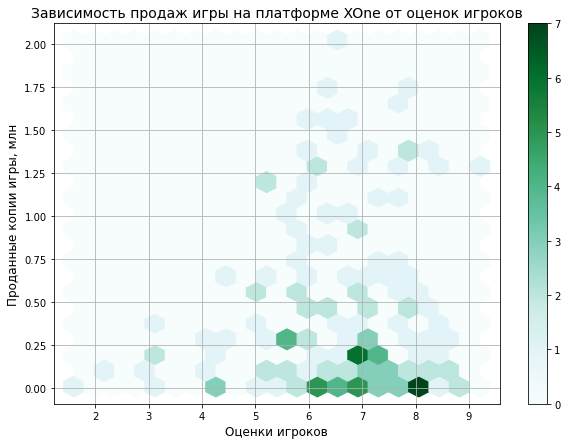

Коэффициент корреляции между оценками игроков и общими продажами игр на XOne равен {0.07744448826540412}


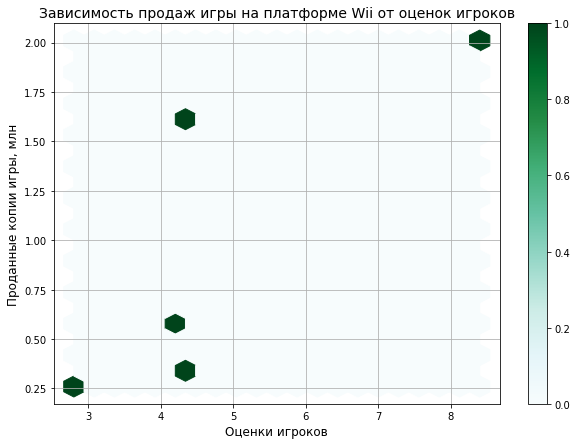

Коэффициент корреляции между оценками игроков и общими продажами игр на Wii равен {0.7922009708191055}


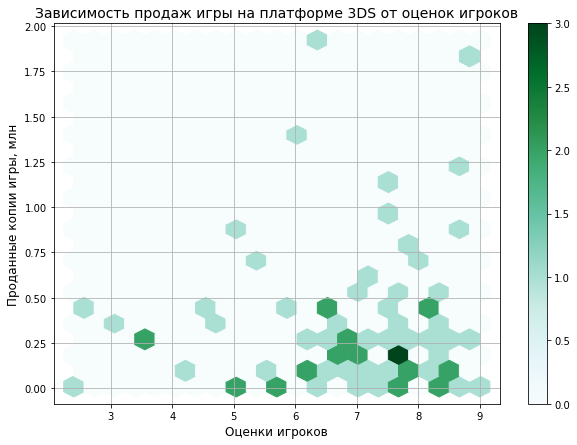

Коэффициент корреляции между оценками игроков и общими продажами игр на 3DS равен {0.08701169155707064}


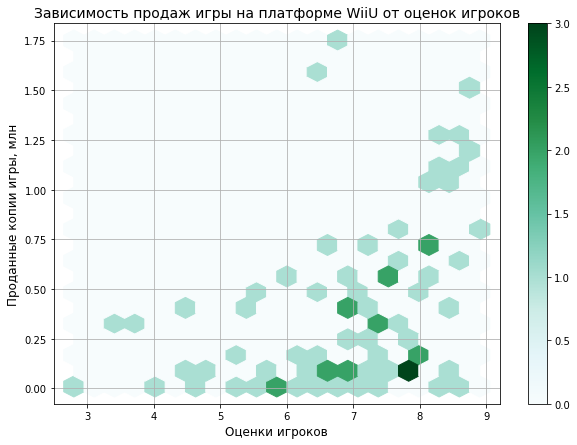

Коэффициент корреляции между оценками игроков и общими продажами игр на WiiU равен {0.4014207244314989}


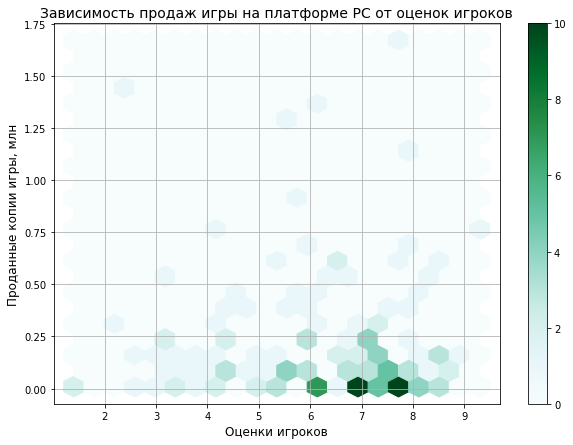

Коэффициент корреляции между оценками игроков и общими продажами игр на PC равен {-0.03286652990090519}


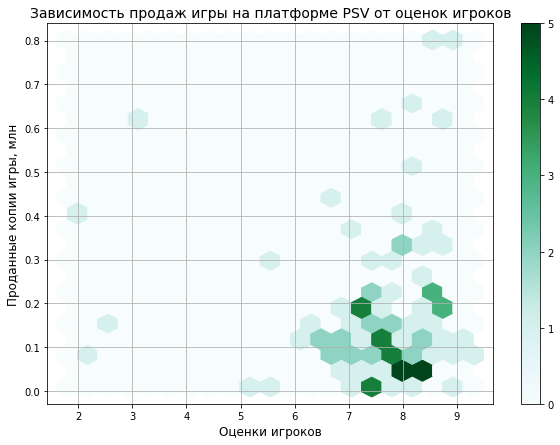

Коэффициент корреляции между оценками игроков и общими продажами игр на PSV равен {0.0009424723319108626}


In [40]:
user_corr_list =[]
for platform in user_corr_games['platform'].unique():
    (user_corr_games
     .query('platform == @platform')
     .plot(x='user_score',
           y='sales_total',
           kind='hexbin',
           gridsize=20,
           figsize=(10, 7),
           sharex=False,
           grid=True)
    )
    corr_coef = user_corr_games[user_corr_games['platform'] == platform]['sales_total']\
     .corr(user_corr_games[user_corr_games['platform'] == platform]['user_score'])
    plt.title(f'Зависимость продаж игры на платформе {platform} от оценок игроков', size=14)
    plt.xlabel('Оценки игроков', size=12)
    plt.ylabel('Проданные копии игры, млн', size=12)
    plt.show()
    print(f'Коэффициент корреляции между оценками игроков и общими продажами игр на {platform} равен',\
    {corr_coef})
    user_corr_list.append(corr_coef)

Оценим значения коэффициентов корреляции

In [41]:
user_corr_series = pd.Series(user_corr_list)
user_corr_series.describe()

count    9.000000
mean     0.153639
std      0.272746
min     -0.032867
25%      0.000942
50%      0.060619
75%      0.087012
max      0.792201
dtype: float64

Из графиков и рассчитанных значений корреляции видно, что зависимость продаж от оценок геймеров еще слабее, нежели от оценок критиков, при этом некоторые расчитанные коэффициенты корреляции имеют отрицательное значение. Единственное достаточно высокое значение коэффициента корреляции объяснимо наличием небольшого числа записей, попавших в анализируемый датасет.

**Вывод:** нельзя точно отвергнуть наличие зависимости между продажами и оценками критиков, однако большинство игр - бестселлеров скорее всего стали успешными не благодаря высоким оценкам критиков, а в результате долгой и усердной работы команды разработчиков, дизайнеров, режиссеров, маркетологов и так далее.  Зависимость же продаж от оценок геймеров скорее всего стоит отвергнуть. Данные утверждения справедливы для всех платформ.

### Анализ прибыльности жанров

Построим диаграмму размаха для продаж по жанрам:

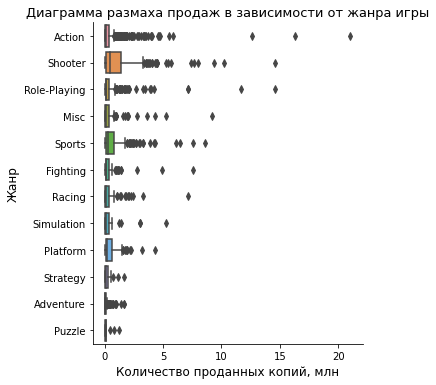

In [42]:
sns.catplot(x='sales_total', y='genre', kind='box',
            data=(
                analize_data
                .sort_values('sales_total', ascending = False)
            )
           )
plt.title('Диаграмма размаха продаж в зависимости от жанра игры', size=13)
plt.xlabel('Количество проданных копий, млн', size=12)
plt.ylabel('Жанр', size=12)
plt.show()

В соответствии с диаграммой размаха представители всего двух жанров удостоились отметки в 20 млн. проданных копий: Misc и Action, ни один из представителей жанров Puzzle, Adventure и Strategy не достигли отметки в 5 млн. проданных копий.

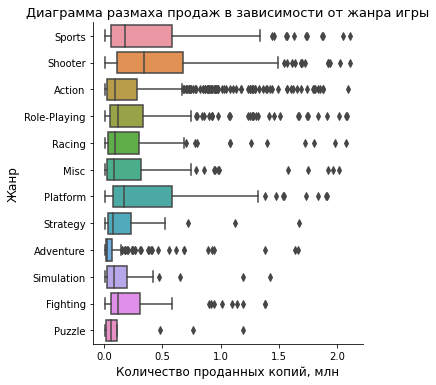

In [43]:

sns.catplot(x='sales_total', y='genre', kind='box',
            data=(
                analize_data
                .query('sales_total < @max_sales_analize_data')
                .sort_values('sales_total', ascending = False)
            )
           )
plt.title('Диаграмма размаха продаж в зависимости от жанра игры', size=13)
plt.xlabel('Количество проданных копий, млн', size=12)
plt.ylabel('Жанр', size=12)
plt.show()

In [44]:
(analize_data
 .query('sales_total < @max_sales_analize_data')
 .groupby('genre')['sales_total']
 .describe()
 .sort_values('count', ascending = False))

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,734.0,0.246662,0.361580,0.01,0.0300,0.100,0.2875,2.09
Role-Playing,282.0,0.297234,0.423363,0.01,0.0525,0.120,0.3350,2.08
Adventure,244.0,0.096762,0.216847,0.01,0.0200,0.030,0.0725,1.66
Sports,193.0,0.390829,0.461325,0.01,0.0600,0.180,0.5800,2.11
Shooter,154.0,0.505195,0.521672,0.01,0.1100,0.340,0.6750,2.11
Misc,149.0,0.252550,0.379169,0.01,0.0300,0.090,0.3200,2.01
Racing,81.0,0.308025,0.470567,0.01,0.0400,0.100,0.3000,2.07
Fighting,77.0,0.261169,0.340228,0.01,0.0600,0.120,0.3100,1.38
Platform,68.0,0.441618,0.545822,0.01,0.0800,0.175,0.5800,1.91


Из более близкого рассмотрения и анализа общих продаж заметно, что наибольшим размахом обладают игры таких жанров как shooter, platform, sports. Это означает, что в среднем эти жанры более успешны, при выпуске игры в этих жанрах более высока вероятность получить хорошую прибыль.  При этом стоит отметить, что они обладают также наибольшим медианным значением продаж, shooter - с большим отрывом. Поэтому в качестве наиболее перспективных жанров следует выбрать именно их, особенно с учетом меньшей конкуренции (меньшим количеством выпускаемых в этом жанре игр) по сравнению с жанрами action, adventure. Наименее же привлекательными кажутся жанры puzzle, simulation, strategy всвязи с минимальными медианными продажами.

**Вывод:** в конце 90-ых индустрия видеоигр начинала свое бурное развитие, однако в поздние 10-е число выпускаемых в год игр начало снижаться; анализ жизненного цикла платформ показал, что установленное медианное время популярности платформы около 6 лет, анализ рынка на момент 2016 года показывает, что тенденция на снижение количества выпускаемых в год игр не отразилась на продажах - за 3 года PS4 обогнала по продажам PS3; наиболее привлекательными платформами для разработки игр с точки зрения дальнейшего развития являются PS4 и XOne, анализ зависимости продаж от оценок критиков и геймеров показал, что нельзя точно отвергнуть наличие зависимости между продажами и оценками критиков, оценки же игроков скорее всего не влияют на продажи, анализ жанров показал, что ***shooter, platform, sports***  - ниболее привлекательные с точки зрения достижения высоких продаж жанры.

## Паттерны поведения игроков разных регионов

### Анализ поведения игроков из NA

#### Определение доли продаж для каждой платформы

**Определим 5 самых популярных платформ для выбранного региона:**

In [45]:
popular_platform_na = (analize_data.groupby('platform')['na_sales']
                       .sum()
                       .sort_values(ascending=False)
                       .index[0:5])
popular_platform_na

Index(['PS4', 'XOne', 'X360', 'PS3', '3DS'], dtype='object', name='platform')

**Построим диаграмму:**

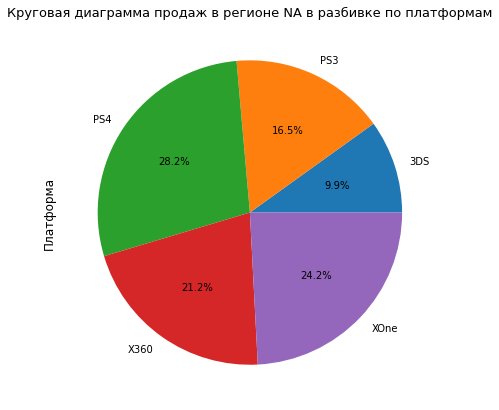

In [46]:
(
analize_data
    .query('platform in @popular_platform_na')
    .groupby('platform')['na_sales']
    .agg('sum')
    .plot(kind = 'pie',
         figsize = (9,7),
         grid= True,
         autopct = '%1.1f%%')
)
plt.title('Круговая диаграмма продаж в регионе NA в разбивке по платформам', size=13)
plt.ylabel('Платформа', size=12)
plt.show()

In [47]:
(analize_data
 .query('platform in @popular_platform_na')
 .groupby('platform')['na_sales']
 .describe())

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.126073,0.499331,0.0,0.0000,0.00,0.050,5.28
PS3,345.0,0.184058,0.521613,0.0,0.0000,0.03,0.160,7.02
PS4,392.0,0.277398,0.583723,0.0,0.0075,0.06,0.260,6.03
X360,186.0,0.439032,1.021400,0.0,0.0400,0.15,0.460,9.66
XOne,247.0,0.377004,0.630618,0.0,0.0300,0.12,0.385,4.59


Как видно из круговой диаграммы в регионе NA нет ярковыраженного лидера по продажам: на лидирующих позициях PS4, XOne и их предшественники PS3 и X360 соответственно. При этом стоит отметить, что приемник XOne отстает по продажам от PS4, а значит, в перспективе группа платформ PS3 и PS4 может занять лидирующие позиции на рынке NA. Так же нельзя не сказать, что группа X360 и XOne является продуктом региона NA.

#### Определение доли продаж для различных жанров

**Определим 5 наиболее популярных жанров**

In [48]:
popular_genre_na = (analize_data.groupby('genre')['na_sales']
                       .sum()
                       .sort_values(ascending=False)
                       .index[0:5])
popular_genre_na

Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')

**Построим диаграмму:**

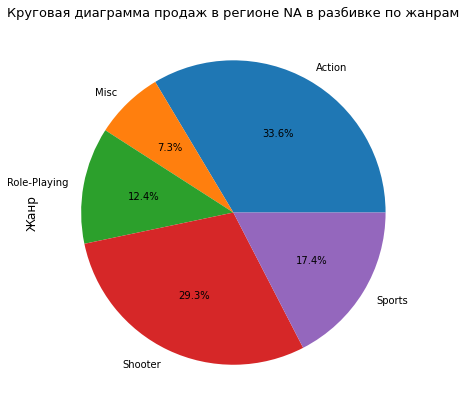

In [49]:
(
analize_data
    .query('genre in @popular_genre_na')
    .groupby('genre')['na_sales']
    .agg('sum')
    .plot(kind = 'pie',
         figsize = (9,7),
         autopct = '%1.1f%%')
)
plt.title('Круговая диаграмма продаж в регионе NA в разбивке по жанрам', size=13)
plt.ylabel('Жанр', size=12)
plt.show()

In [50]:
(analize_data
 .query('genre in @popular_genre_na')
 .groupby('genre')['na_sales']
 .describe())

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,764.0,0.164699,0.543476,0.0,0.00,0.02,0.1200,9.66
Misc,154.0,0.178312,0.547258,0.0,0.00,0.01,0.1575,5.70
Role-Playing,292.0,0.158904,0.504518,0.0,0.00,0.02,0.1000,5.28
Shooter,187.0,0.586845,0.993237,0.0,0.05,0.20,0.6550,6.73
Sports,213.0,0.306432,0.490684,0.0,0.00,0.08,0.3900,2.49


Как видно из круговой диаграммы наибольшей популярностью пользуются такие жанры как action и shooter, наименьшей - role-playing и misc. Исходя из предыдущих исследований в качестве вектора развития стоит выбрать shooter и sport, что дополнительно подтверждается величиной медианных продаж в этих жанрах. Жанр action перенасыщен, тяжело будет сделать игру в этом жанре и удивить игроков, чтобы продажи были достаточно высокими.

#### Определение влияния рейтинга ESRB на продажи в регионе

**Оценим величину продаж относительно рейтинга**

In [51]:
(analize_data
 .groupby('rating')['na_sales']
 .describe()
 .sort_values('count', ascending = False))

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
unknown,975.0,0.091467,0.450159,0.0,0.00,0.00,0.0200,6.03
M,369.0,0.447724,0.912329,0.0,0.04,0.14,0.4600,9.66
T,333.0,0.149520,0.335906,0.0,0.00,0.04,0.1300,2.78
E,298.0,0.264899,0.474395,0.0,0.00,0.05,0.2075,3.15
E10+,250.0,0.216080,0.318003,0.0,0.03,0.12,0.3000,2.49


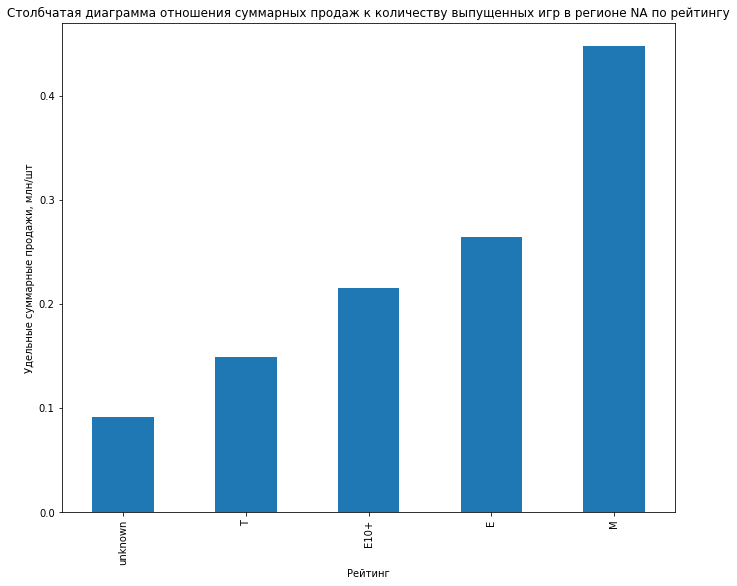

In [52]:
(
    (
    analize_data
 .groupby('rating')['na_sales']
 .sum()/analize_data
 .groupby('rating')['na_sales']
  .count()
    )
 .sort_values()
 .plot(kind = 'bar', figsize = (11,9))
)
plt.title('Столбчатая диаграмма отношения суммарных продаж к количеству выпущенных игр в регионе NA по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Удельные суммарные продажи, млн/шт')
plt.show()

Как видно из столбчатой диаграммы: на лидирующих позициях игры с рейтингом "М", затем "E", "Е10+" и "Т", замыкают пятерку игры без рейтинга ESRB. Это может говорить о высокой стпени влияния наличия рейтинга ESRB на продажи в регионе NA.

**Вывод:** для игроков из NA наиболее характерны игры жанров action и shooter, на группах платформ X360, XOne и PS3, PS4. В качестве наиболее перспективного направления стоит взять платформу PS4, жанры shooter и sport. Анализ также показал высокую вероятность наличия зависимости, между рейтингом, выставляемым ESRB, и суммарными продажами в регионе NA.

### Анализ поведения игроков из EU

#### Определение доли продаж для каждой платформы

**Определим 5 самых популярных платформ для выбранного региона:**

In [53]:
popular_platform_eu = (analize_data.groupby('platform')['eu_sales']
                       .sum()
                       .sort_values(ascending=False)
                       .index[0:5])
popular_platform_eu

Index(['PS4', 'PS3', 'XOne', 'X360', '3DS'], dtype='object', name='platform')

**Построим диаграмму:**

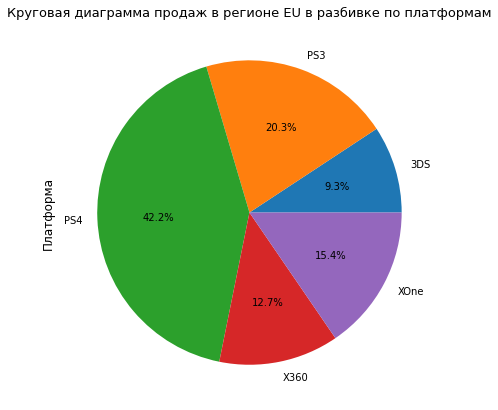

In [54]:
(
analize_data
    .query('platform in @popular_platform_eu')
    .groupby('platform')['eu_sales']
    .agg('sum')
    .plot(kind = 'pie',
         figsize = (9,7),
         grid= True,
         autopct = '%1.1f%%')
)
plt.title('Круговая диаграмма продаж в регионе EU в разбивке по платформам', size=13)
plt.ylabel('Платформа', size=12)
plt.show()

In [55]:
(analize_data
 .query('platform in @popular_platform_eu')
 .groupby('platform')['eu_sales']
 .describe())

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.102178,0.381832,0.0,0.00,0.00,0.0400,4.19
PS3,345.0,0.196551,0.657879,0.0,0.00,0.02,0.1500,9.09
PS4,392.0,0.359923,0.810843,0.0,0.00,0.08,0.3000,6.31
X360,186.0,0.228602,0.538409,0.0,0.02,0.08,0.2075,5.14
XOne,247.0,0.208866,0.365306,0.0,0.02,0.07,0.2200,2.19


Как видно из круговой диаграммы самой популярной платформой является PS4, затем PS3. Суммарно платформа PS3 и её приемник PS4 занимают около 2/3 рынка EU. В отличие от остальных регионов в EU нет своей платформы для игр. Наиболее благоприятным вектором развития является платформа PS4.

#### Определение доли продаж для различных жанров

**Определим 5 наиболее популярных жанров**

In [56]:
popular_genre_eu = (analize_data.groupby('genre')['eu_sales']
                       .sum()
                       .sort_values(ascending=False)
                       .index[0:5])
popular_genre_eu

Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'], dtype='object', name='genre')

**Построим диаграмму:**

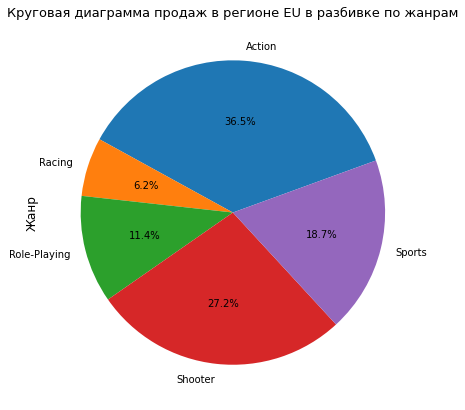

In [57]:
(
analize_data
    .query('genre in @popular_genre_eu')
    .groupby('genre')['eu_sales']
    .agg('sum')
    .plot(kind = 'pie',
         figsize = (9,7),
         autopct = '%1.1f%%',
         startangle = 20)
)
plt.title('Круговая диаграмма продаж в регионе EU в разбивке по жанрам', size=13)
plt.ylabel('Жанр', size=12)
plt.show()

In [58]:
(analize_data
 .query('genre in @popular_genre_eu')
 .groupby('genre')['eu_sales']
 .describe())

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,764.0,0.154306,0.517123,0.0,0.000,0.02,0.120,9.09
Racing,85.0,0.237529,0.404180,0.0,0.020,0.06,0.260,2.15
Role-Playing,292.0,0.126610,0.423744,0.0,0.000,0.01,0.080,4.19
Shooter,187.0,0.469840,0.767501,0.0,0.055,0.19,0.485,5.86
Sports,213.0,0.283991,0.801542,0.0,0.010,0.05,0.210,6.12


Как видно из круговой диаграммы наибольшей популярностью пользуются такие жанры как shooter и sports, наименьшей - role-playing и action. Исходя из предыдущих исследований в качестве вектора развития стоит выбрать shooter и sport.

#### Определение влияния рейтинга ESRB на продажи в регионе

**Оценим величину продаж относительно рейтинга**

In [59]:
(analize_data
 .groupby('rating')['eu_sales']
 .describe()
 .sort_values('count', ascending = False))

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
unknown,975.0,0.080626,0.357938,0.0,0.00,0.00,0.02,5.86
M,369.0,0.393821,0.812837,0.0,0.03,0.13,0.39,9.09
T,333.0,0.125976,0.279076,0.0,0.01,0.04,0.11,2.50
E,298.0,0.278423,0.713379,0.0,0.02,0.05,0.22,6.12
E10+,250.0,0.170120,0.208036,0.0,0.04,0.10,0.22,1.39


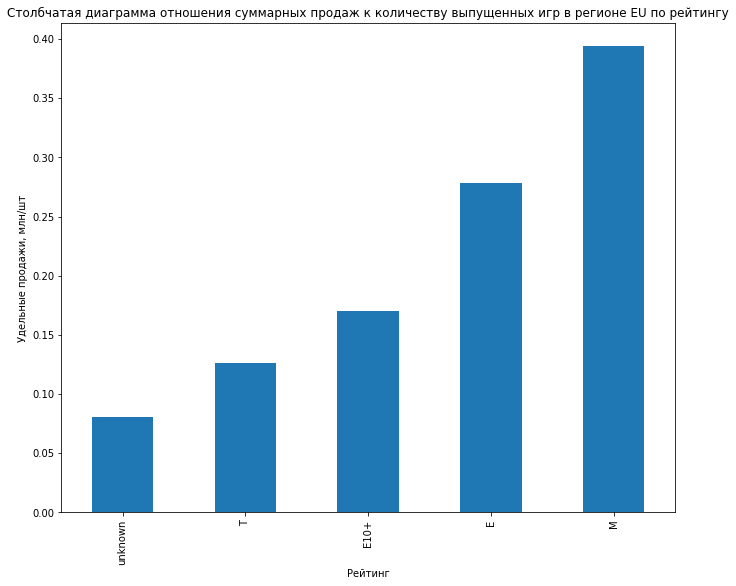

In [60]:
(
    (
     analize_data
     .groupby('rating')['eu_sales']
     .sum()/analize_data
     .groupby('rating')['eu_sales']
     .count()
    )
 .sort_values()
 .plot(kind = 'bar', figsize = (11,9)))
plt.title('Столбчатая диаграмма отношения суммарных продаж к количеству выпущенных игр в регионе EU по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Удельные продажи, млн/шт')
plt.show()

Как видно из столбчатой диаграммы: на лидирующих позициях игры с рейтингом "М", затем "E", "Е10+" и "Т", замыкают пятерку игры без рейтинга ESRB. Это может говорить о высокой стпени влияния наличия рейтинга ESRB на продажи в регионе EU.

**Вывод:** для игроков из EU также наиболее характерны игры жанров shooter и sports, на платформах PS3 и PS4. В качестве наиболее перспективного направления стоит взять платформу PS4, жанры shooter и sport. Анализ также показал высокую вероятность наличия зависимости между рейтингом, выставляемым ESRB, и суммарными продажами в регионе EU.

### Аанализ поведения игроков из JP

#### Определение доли продаж для каждой платформы

**Определим 5 самых популярных платформ для выбранного региона:**

In [61]:
popular_platform_jp = (analize_data.groupby('platform')['jp_sales']
                       .sum()
                       .sort_values(ascending=False)
                       .index[0:5])
popular_platform_jp

Index(['3DS', 'PS3', 'PSV', 'PS4', 'WiiU'], dtype='object', name='platform')

**Построим диаграмму:**

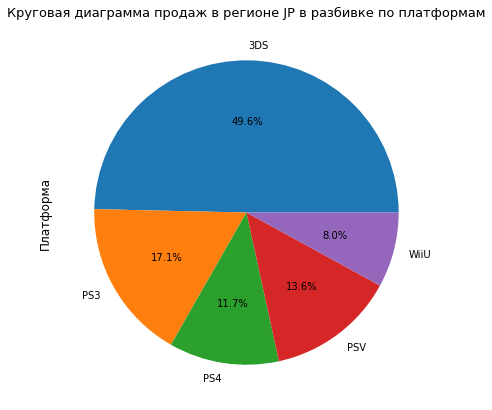

In [62]:
(
analize_data
    .query('platform in @popular_platform_jp')
    .groupby('platform')['jp_sales']
    .agg('sum')
    .plot(kind = 'pie',
         figsize = (9,7),
         grid= True,
         autopct = '%1.1f%%')
)
plt.title('Круговая диаграмма продаж в регионе JP в разбивке по платформам', size=13)
plt.ylabel('Платформа', size=12)
plt.show()

In [63]:
(analize_data
 .query('platform in @popular_platform_jp')
 .groupby('platform')['jp_sales']
 .describe())

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.223795,0.566661,0.0,0.01,0.06,0.145,4.35
PS3,345.0,0.067681,0.109196,0.0,0.00,0.03,0.090,0.98
PS4,392.0,0.040714,0.069101,0.0,0.00,0.01,0.050,0.49
PSV,358.0,0.051927,0.075437,0.0,0.01,0.03,0.060,0.90
WiiU,115.0,0.094609,0.235351,0.0,0.00,0.00,0.090,1.46


Как видно из круговой диаграммы регион JP самодостаточный: все 5 самых популярных консолей - продукт региона JP, самой популярной платформой является 3DS. Суммарно группа платформ фирмы nintendo занимает более половины рынка JP. При этом стоит отметить, что в отличие от остальных рынков, здесь лидируют портативные консоли: так в топ-5 вошла лишь две домашние платформы: PS3, PS4. Тем не менее, 3DS является уже устаревающей платформой, как и PSV, а следовательно в качестве вектора развития стоит опираться на PS4.

#### Определение доли продаж для различных жанров

**Определим 5 наиболее популярных жанров**

In [64]:
popular_genre_jp = (analize_data.groupby('genre')['jp_sales']
                       .sum()
                       .sort_values(ascending=False)
                       .index[0:5])
popular_genre_jp

Index(['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter'], dtype='object', name='genre')

**Построим диаграмму:**

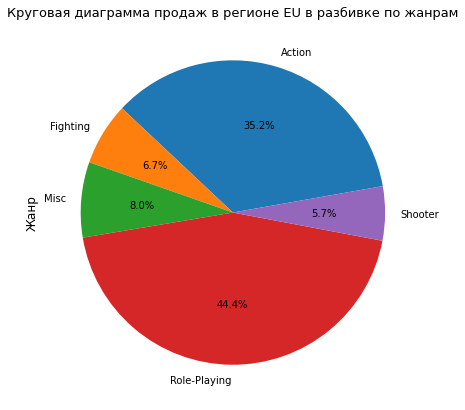

In [65]:
(
analize_data
    .query('genre in @popular_genre_jp')
    .groupby('genre')['jp_sales']
    .agg('sum')
    .plot(kind = 'pie',
         figsize = (9,7),
         autopct = '%1.1f%%',
         startangle = 10)
)
plt.title('Круговая диаграмма продаж в регионе EU в разбивке по жанрам', size=13)
plt.ylabel('Жанр', size=12)
plt.show()

In [66]:
(analize_data
 .query('genre in @popular_genre_jp')
 .groupby('genre')['jp_sales']
 .describe())

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,764.0,0.052997,0.168396,0.0,0.00,0.01,0.05,2.79
Fighting,80.0,0.095625,0.288807,0.0,0.00,0.03,0.08,2.43
Misc,154.0,0.059740,0.128587,0.0,0.00,0.02,0.07,0.90
Role-Playing,292.0,0.174795,0.500255,0.0,0.02,0.05,0.12,4.35
Shooter,187.0,0.035348,0.121961,0.0,0.00,0.00,0.02,1.46


Как видно из круговой диаграммы наибольшей популярностью пользуется жанр role-playing, занимающий почти половину рынка. Исходя из предыдущих исследований в качестве вектора развития стоит выбрать Shooter из-за невысокой по сравнению с отстальными жанрами конкуренцией и достаточно хорошими показателями на общемировом рынке. Однако, если придерживаться консервативного подхода, в этом регионе стоит пойти вразрез с общемировой тенденцией и обратить внимание на жанр role-playing.

#### Определение влияния рейтинга ESRB на продажи в регионе

**Оценим величину продаж относительно рейтинга**

In [67]:
(analize_data
 .groupby('rating')['jp_sales']
 .describe()
 .sort_values('count', ascending = False))

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
unknown,975.0,0.087231,0.314808,0.0,0.0,0.02,0.06,4.35
M,369.0,0.038238,0.089551,0.0,0.0,0.00,0.04,0.98
T,333.0,0.061832,0.169380,0.0,0.0,0.01,0.08,2.62
E,298.0,0.050805,0.174267,0.0,0.0,0.00,0.01,1.40
E10+,250.0,0.023560,0.108386,0.0,0.0,0.00,0.00,1.46


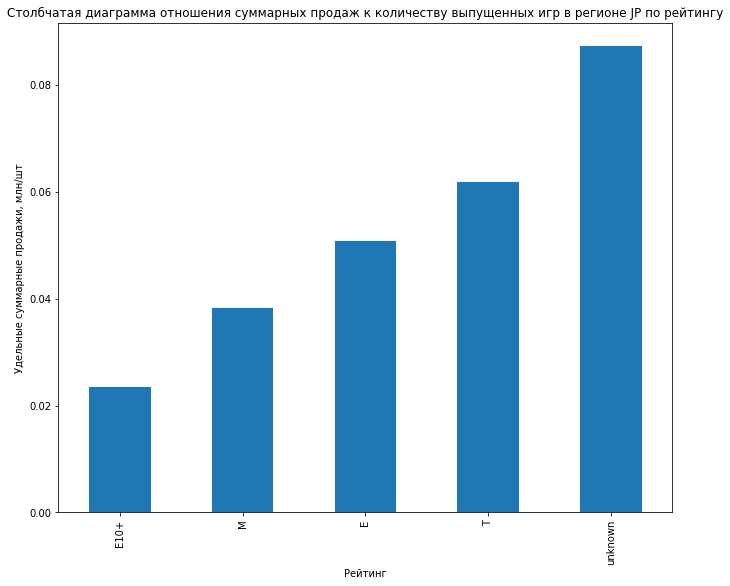

In [68]:
(
    (
    analize_data
     .groupby('rating')['jp_sales']
     .sum()/analize_data
     .groupby('rating')['jp_sales']
     .count()
    )
     .sort_values()
 .plot(kind = 'bar', figsize = (11,9))
)
plt.title('Столбчатая диаграмма отношения суммарных продаж к количеству выпущенных игр в регионе JP по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Удельные суммарные продажи, млн/шт')
plt.show()

На рынке JP видится другая по сравнения с EU и NA ситуация: как и раньше игр без рейтинга выпускается почти в 3 раза больше, однако же удельные продажи игр, ничуть не меньше игр с рейтингом. Этот факт не позволяет сказать о наличии связи между рейтингом ESRB и продажами в регионе JP.

**Вывод:** Регион JP достаточно своеобразный: сильно отличается от NA и EU по своим предпочтениям. Для игроков из JP наиболее характерны игры жанров role-playing и action на платформе 3DS. Особое внимание на рынке JP уделено портативным консолям. В качестве наиболее перспективного направления стоит взять платформу PS4, жанры shooter и role-playing. Анализ также показал отсутствие зависимости, между рейтингом, выставляемым ESRB, и суммарными продажами в JP.

## Проверка гипотез

Установим уровень статистической значимости в 5%.

In [69]:
alpha = 0.05

### Проверка гипотезы 1

**H0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Н1:** Средние пользовательские рейтинги платформ Xbox One и PC разные;

**Используем двустороннюю гипотезу о равенстве средних двух независимых выоборок.**

In [70]:
results = st.ttest_ind(analize_data.query('platform == "XOne"')\
                       .dropna()\
                       ['user_score'],
                       analize_data.query('platform == "PC"')\
                       .dropna()\
                       ['user_score'],
                      alternative = 'two-sided',
                      equal_var = False)

user_score_xone = analize_data.query('platform == "XOne"')\
.dropna()['user_score'].mean()

user_score_pc = analize_data.query('platform == "PC"')\
.dropna()['user_score'].mean()

print('Оцениваемые средние значения оценок игроков выборок:')
print(f'Для XOne = {user_score_xone}')
print(f'Для PC = {user_score_pc}')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Оцениваемые средние значения оценок игроков выборок:
Для XOne = 6.538181818181818
Для PC = 6.3020270270270276
p-value: 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


У нас нет достаточных оснований, чтобы отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC.

### Проверка гипотезы 2

**Н0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые;

**Н1:** Средние пользовательские рейтинги жанров Action и Sports разные.

**Используем двустороннюю гипотезу о равенстве средних двух независимых выоборок.**

In [71]:
results = st.ttest_ind(analize_data.query('genre == "Action"')\
                       .dropna()['user_score'],
                       analize_data.query('genre == "Sports"')\
                       .dropna()['user_score'],
                       alternative = 'two-sided',
                       equal_var = False)

user_score_action = analize_data.query('genre == "Action"')\
                       .dropna()['user_score'].mean()

user_score_sports = analize_data.query('genre == "Sports"')\
                       .dropna()['user_score'].mean()

print('Оцениваемые средние значения рейтингов выборок:')
print(f'Для жанра Action = {user_score_action}')
print(f'Для жанра Sports = {user_score_sports}')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Оцениваемые средние значения рейтингов выборок:
Для жанра Action = 6.9362459546925574
Для жанра Sports = 5.665454545454545
p-value: 1.0496920005008588e-13
Отвергаем нулевую гипотезу


У нас достаточно данных, чтобы отвергнуть нулевую гипотезу о равенстве пользовательских рейтингов жанров sport и action.

## Общий вывод:

В настоящей работе было проведено исследование данных интернет-магазина «Стримчик», занимающегося продажей видеоигр:

**Предобработка данных**, которая включала изменение наименований столбцов, проверку наличия дубликатов, преобразование типов данных, обработку пропусков, при которой обнаружены пропуски в столбцах name, year_of_release, critic_score, user_score и rating, удалены данные с пропусками в столбце name, rating, остальные столбца оставлены с пропусками во избежание искажения дальнейшего анализа; добавлены столбцы с общемировыми продажами;

**Исследовательский анализ данных**, в ходе которого были проанализированы: ***количество, выпускаемых в год игр***: в конце 90-ых индустрия видеоигр начинала свое бурное развитие, однако в поздние 10-е в свзяи с увеличением трат на разработку, ростом качества видеоигр, приходом больших корпораций в индустрию количество выпускаемых игр в год начало снижаться, ***популярность различных плафторм и их жизненный цикл***:самые популярные платформы за все время наблюдений  : PS2, DS, PS3, Wii, X360, установленное медианное время популярности платформы около 6 лет, ***рынок в настоящее время***:на рынке наблюдается тенденция на укрупнение, улучшение качества выпускаемых игр и снижение количества, тем не их менее продажи растут, наиболее быстро развивающаяся консоли - PS4, XOne затем 3DS, ***влияние оценок критиков и геймеров на продажи***: нельзя точно отвергнуть наличие зависимости между продажами и оценками критиков, зависимость же продаж от оценок геймеров скорее всего стоит отвергнуть ***прибыльность жанров***:  shooter, platform, sports - ниболее привлекательные с точки зрения достижения высоких продаж жанры

**Анализ покупательского поведения геймеров из разных регионов**, в ходе которой установлено, что для ***геймеров из NA*** наиболее характерны игры жанров action и shooter, на группах платформ X360, XOne и PS3, PS4, в качестве наиболее перспективного направления стоит взять платформу PS4, жанры shooter и sport, анализ также показал возможное наличие зависимости, между рейтингом, выставляемым ESRB и суммарными продажами; для ***геймеров из EU*** также наиболее характерны игры жанров shooter и sports, на платформах PS3, PS4, в качестве наиболее перспективного направления стоит взять платформу PS4, жанры shooter и sport, анализ также показал возможное наличие зависимости, между рейтингом, выставляемым ESRB и суммарными продажами в регионе; для ***геймеров из JP*** наиболее характерны игры жанров role-playing и action на платформах 3DS, PSV, PS3, особое внимание на рынке JP уделено портативным консолям, в качестве наиболее перспективного направления стоит взять платформу PS4, жанры shooter и role-playing, анализ также показал отсутствие зависимости, между рейтингом, выставляемым ESRB, и суммарными продажами.

**Проверка гипотез**, в ходе которой установлено:
1) у нас нет достаточных оснований, чтобы отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC;
2) у нас достаточно данных, чтобы отвергнуть нулевую гипотезу о равенстве пользовательских рейтингов жанров sport и action.

Возможно развитие на рынках EU и NA видится в разработке игр в жанрах shooter и sport на консоли PS4, на рынке JP - стоит обратить внимание на развивающиеся портативные консоли, консоль PS4, жанры shooter и role-playing. Так же на основании полученных выводов при попытке выхода игры в новом регионе не стоит опираться на общемировые тенденции вследствие возможного искажения рынка в результате влияния рынков EU и NA в сторону жанров action и shooter на домашних консолях, а потому стоит проводить дальнейшее исследования конкретных регионов.